In [33]:
from EOF_manage import *
from basic_op_jup import *
from I_O_manage import *
from KMEAN_manage import *
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cdo import Cdo
import pandas as pd
import cartopy.crs as ccrs

cdo=Cdo()

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

matplotlib.rc('font', **font)

In [34]:
dataset_0, dataset_names = input_interface('I_O.json')
dataset = dataset_0.rolling(time=15, center=True).mean().dropna("time")

### Day of year serie

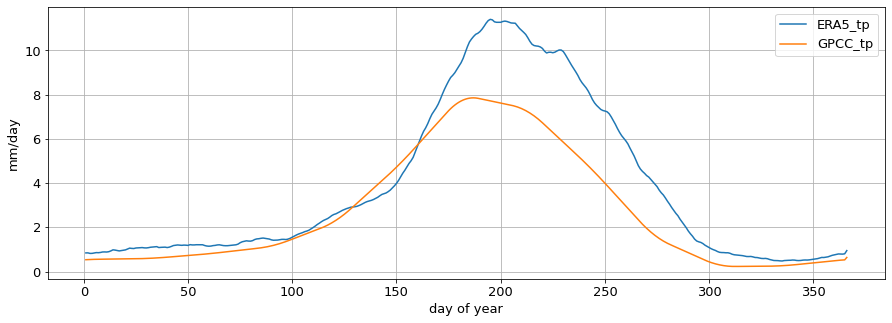

In [35]:
dataset_doy = dataset.groupby('time.dayofyear').mean().rename(dayofyear = 'time')

plt.figure(figsize = (15,5))

for i in range(len(dataset_names)):
    getattr(dataset_doy,dataset_names[i]).mean(['lat','lon']).plot(label = dataset_names[i])

plt.xlabel('day of year')
plt.ylabel('mm/day')
plt.grid()
plt.legend()

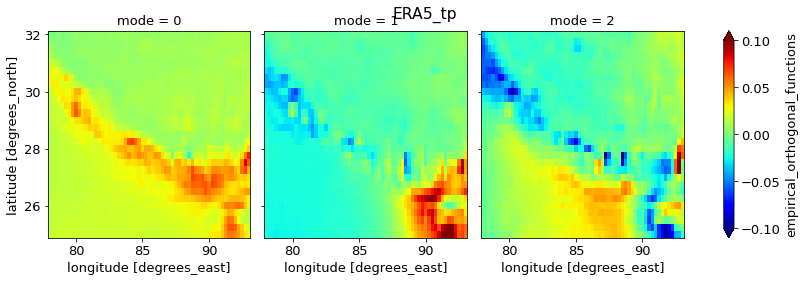

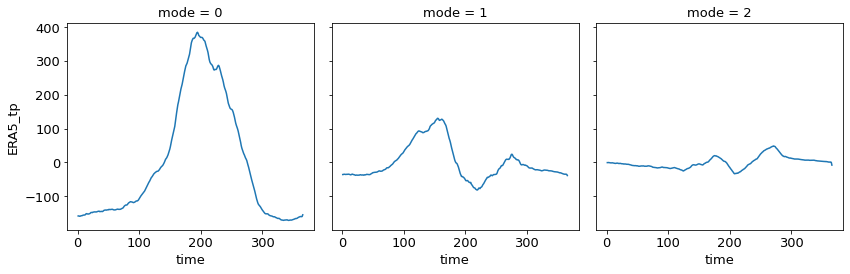

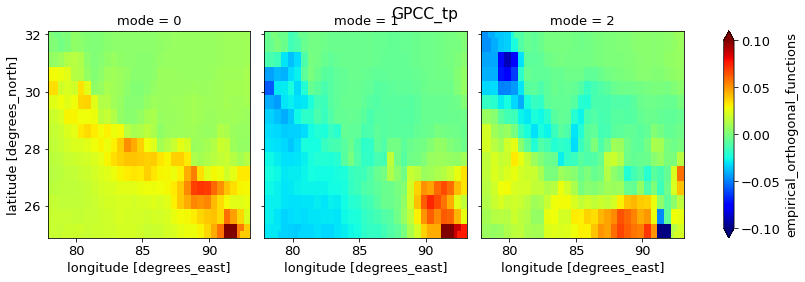

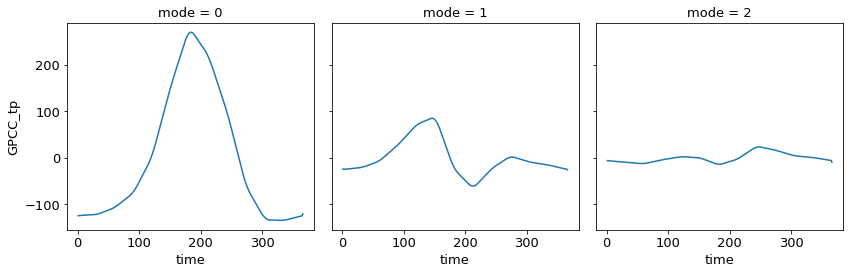

In [36]:
# Computing eofs and pcs for doy dataset
eof_database_doy, pc_database_doy, exp_databas_doy, solver_list_doy = eof_base_interface(dataset_doy, dataset_names, 'EOF.json') 

for i in range(len(dataset_names)):
    getattr(eof_database_doy,dataset_names[i]).plot(figsize = (12,4), col="mode", col_wrap = 3, vmin = -0.1, vmax = 0.1, cmap = 'jet')
    plt.suptitle(f'{dataset_names[i]}')
    getattr(pc_database_doy,dataset_names[i]).plot(figsize = (12,4), col="mode", col_wrap = 3)


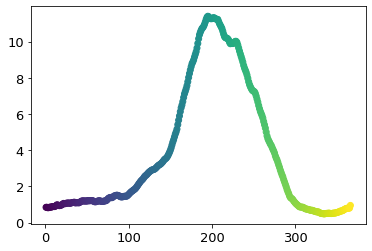

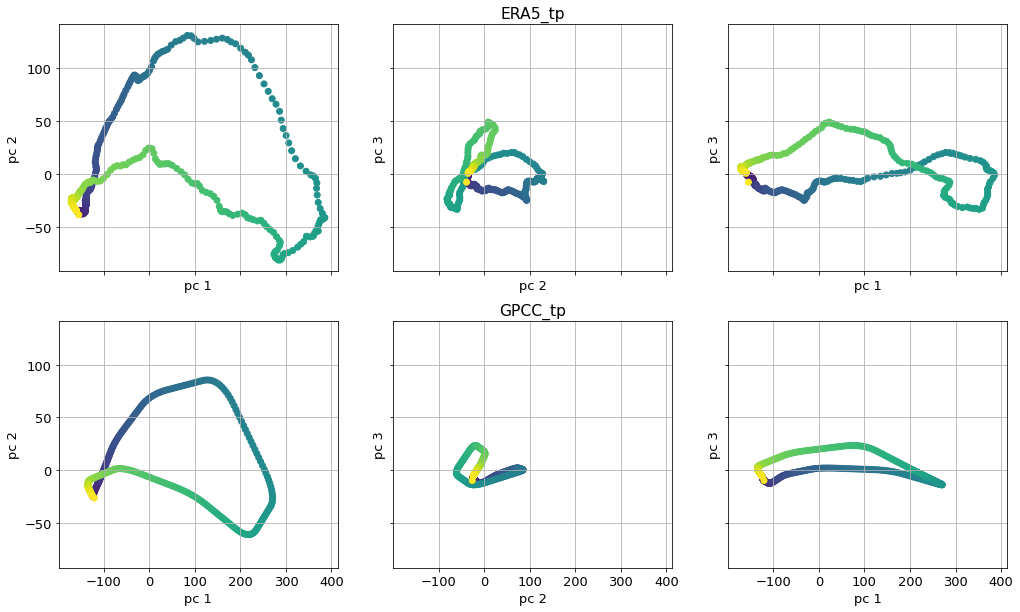

In [37]:
plt.scatter(dataset_doy.time, dataset_doy.ERA5_tp.mean(['lat','lon']), c = dataset_doy.time)  


fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = True, sharey = True)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(getattr( pc_database_doy,dataset_names[i]).sel(mode = 0) , getattr( pc_database_doy,dataset_names[i]).sel(mode = 1) , c = pc_database_doy.time)
    axs[i,0].set_xlabel('pc 1')
    axs[i,0].set_ylabel('pc 2')
    axs[i,0].grid() 
    axs[i,1].scatter(getattr( pc_database_doy,dataset_names[i]).sel(mode = 1) , getattr( pc_database_doy,dataset_names[i]).sel(mode = 2), c = pc_database_doy.time)
    axs[i,1].set_xlabel('pc 2')
    axs[i,1].set_ylabel('pc 3')
    axs[i,1].grid()  
    axs[i,2].scatter(getattr( pc_database_doy,dataset_names[i]).sel(mode = 0) , getattr( pc_database_doy,dataset_names[i]).sel(mode = 2), c = pc_database_doy.time)
    axs[i,2].set_xlabel('pc 1')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].grid()


    

### Daily serie

Focus on 1989 monsoon

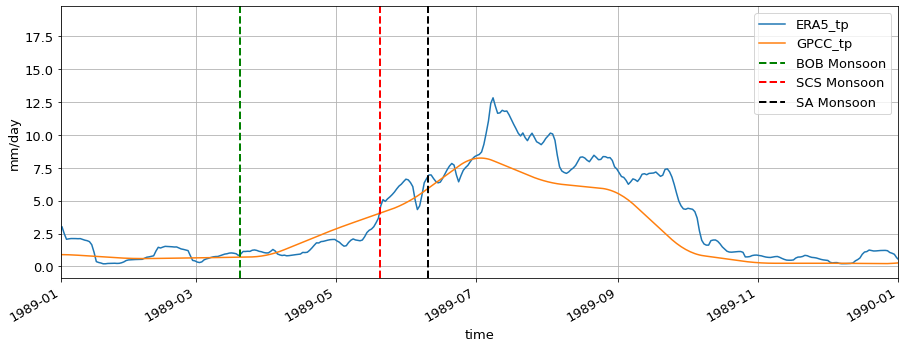

In [38]:
plt.figure(figsize = (15,5))

for i in range(len(dataset_names)):
    getattr(dataset,dataset_names[i]).mean(['lat','lon']).plot(label = dataset_names[i])

plt.xlabel('time')
plt.ylabel('mm/day')
plt.xlim(pd.to_datetime('1989-01-01'),pd.to_datetime('1990-01-01'))
plt.axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
plt.axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
plt.axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
plt.grid()
plt.legend()

<Figure size 432x288 with 0 Axes>

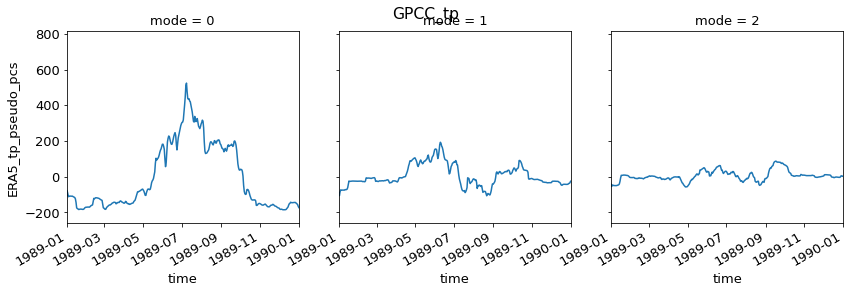

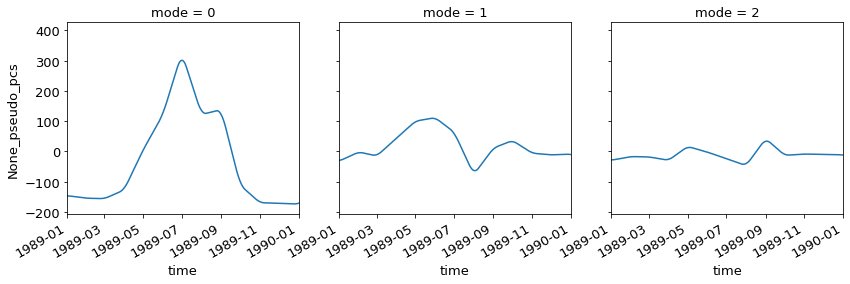

In [61]:
# Computing eofs and pcs for daily dataset
pc_database = eof_proj_interface(solver_list_doy, dataset, dataset_names, 'EOF.json')
#eof_database, pc_database, exp_databas, solver_list = eof_base_interface(dataset, dataset_names, 'EOF.json') 

for i in range(len(dataset_names)):
    plt.suptitle(f'{dataset_names[i]}')
    getattr(pc_database,dataset_names[i]).plot(figsize = (12,4), col="mode", col_wrap = 3)
    plt.xlim(pd.to_datetime('1989-01-01'),pd.to_datetime('1990-01-01'))

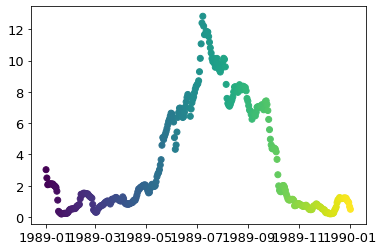

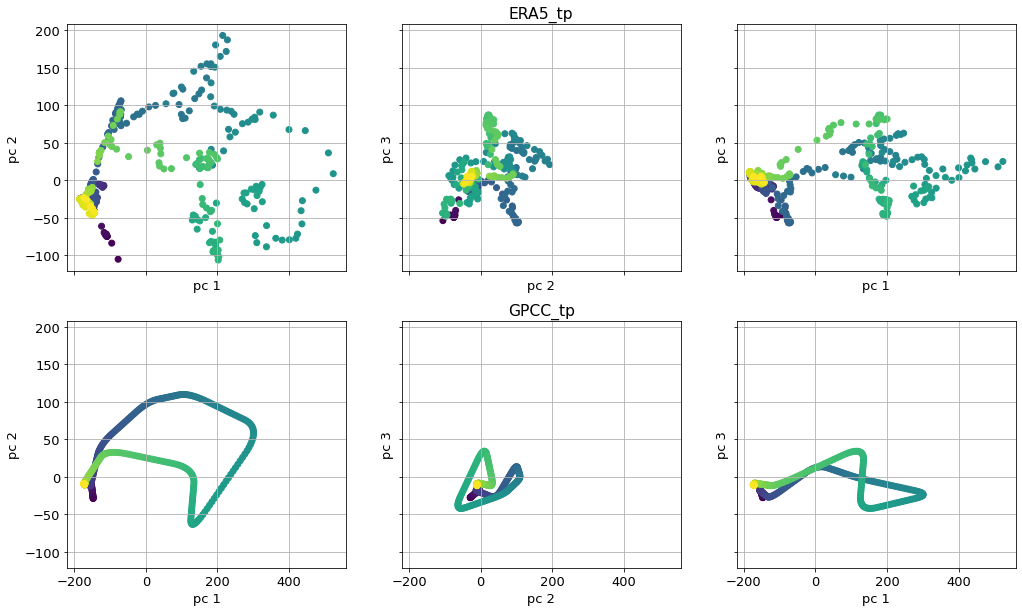

In [62]:
plot_set = pc_database.sel(time = slice('1989-01-01','1990-01-01'))
plot_setti = dataset.sel(time = slice('1989-01-01','1990-01-01'))
plt.scatter(plot_setti.time, plot_setti.ERA5_tp.mean(['lat','lon']), c = plot_setti.time)  

fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = True, sharey = True)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 1), c = plot_set.time)
    axs[i,0].set_xlabel('pc 1')
    axs[i,0].set_ylabel('pc 2')
    axs[i,0].grid() 
    axs[i,1].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 1) , getattr( plot_set,dataset_names[i]).sel(mode = 2), c = plot_set.time)
    axs[i,1].set_xlabel('pc 2')
    axs[i,1].set_ylabel('pc 3')
    axs[i,1].grid()  
    axs[i,2].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 2), c = plot_set.time)
    axs[i,2].set_xlabel('pc 1')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].grid()

In [63]:
n_season = 2

model_list, cc_database = kmean_models_dataset(pc_database, dataset_names, n_season, 300)
predict_database = kmean_prediction_dataset(pc_database, dataset_names, model_list)

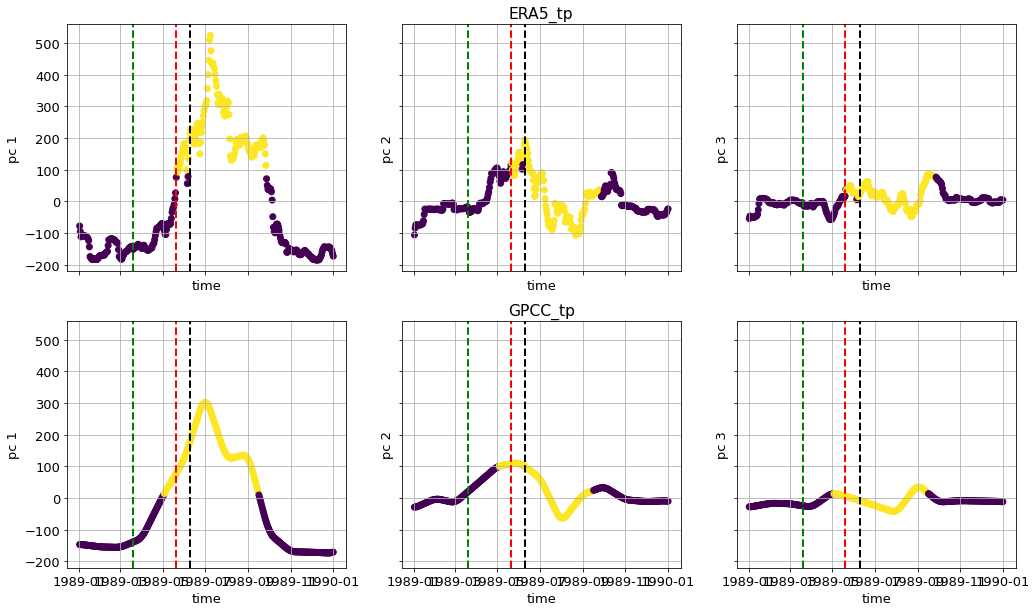

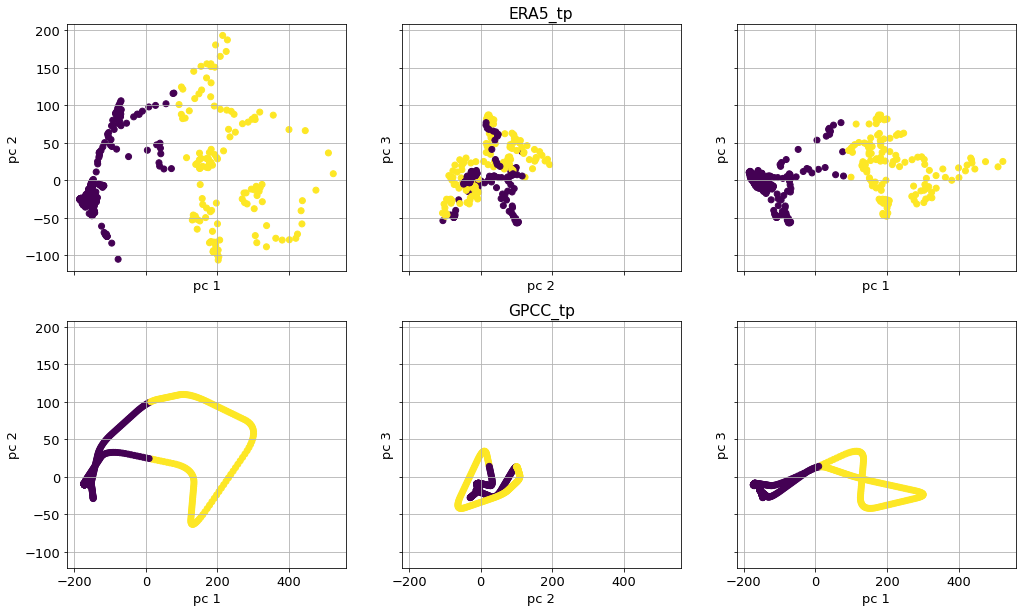

In [64]:
plot_set = predict_database.sel(time = slice('1989-01-01','1990-01-01'))

fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = True, sharey = True)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(plot_set.time , getattr( plot_set,dataset_names[i]).sel(mode = 0), c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,0].set_xlabel('time')
    axs[i,0].set_ylabel('pc 1')
    axs[i,0].axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
    axs[i,0].axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    axs[i,0].axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    axs[i,0].grid() 
    axs[i,1].scatter(plot_set.time , getattr( plot_set,dataset_names[i]).sel(mode = 1),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,1].set_xlabel('time')
    axs[i,1].set_ylabel('pc 2')
    axs[i,1].axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
    axs[i,1].axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    axs[i,1].axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    axs[i,1].grid()  
    axs[i,2].scatter(plot_set.time , getattr( plot_set,dataset_names[i]).sel(mode = 2),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,2].set_xlabel('time')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].axvline(pd.to_datetime('1989-03-20'), color='g', linestyle='--', lw=2, label = 'BOB Monsoon')
    axs[i,2].axvline(pd.to_datetime('1989-05-20'), color='r', linestyle='--', lw=2, label = 'SCS Monsoon')
    axs[i,2].axvline(pd.to_datetime('1989-06-10'), color='k', linestyle='--', lw=2, label = 'SA Monsoon')
    axs[i,2].grid()

fig, axs = plt.subplots(len(dataset_names),3, figsize = (17,len(dataset_names)*5), sharex = True, sharey = True)

for i in range(len(dataset_names)):
    axs[i,1].set_title(dataset_names[i])    
    axs[i,0].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 1), c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,0].set_xlabel('pc 1')
    axs[i,0].set_ylabel('pc 2')
    axs[i,0].grid() 
    axs[i,1].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 1) , getattr( plot_set,dataset_names[i]).sel(mode = 2),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,1].set_xlabel('pc 2')
    axs[i,1].set_ylabel('pc 3')
    axs[i,1].grid()  
    axs[i,2].scatter(getattr( plot_set,dataset_names[i]).sel(mode = 0) , getattr( plot_set,dataset_names[i]).sel(mode = 2),  c = getattr(plot_set, f'prediction_{dataset_names[i]}'))
    axs[i,2].set_xlabel('pc 1')
    axs[i,2].set_ylabel('pc 3')
    axs[i,2].grid()

In [65]:
st_yr = 1970
end_yr = 2011

onset_paper = [146,147,169,155,146,151,151,150,148,164,152,150,148,163,151,148,155,153,145,154,139,153,156,148,148,159,154,160,153,145,151,146,160,164,155,158,146,148,151,143,151]

onset_date = np.empty((len(dataset_names),end_yr-st_yr,n_season))
season_len = np.empty((len(dataset_names),end_yr-st_yr,n_season))

by_year = predict_database.groupby('time.year')

for i in range(len(dataset_names)):

    k = 0

    for j in np.arange(st_yr,end_yr,1):

        for y in range(n_season):

            supp = np.squeeze(np.where(getattr(by_year[j],f'prediction_{dataset_names[i]}') == y))

            onset_date[i][k][y] = supp[0]
            season_len[i][k][y] = len(supp)

        k = k+1

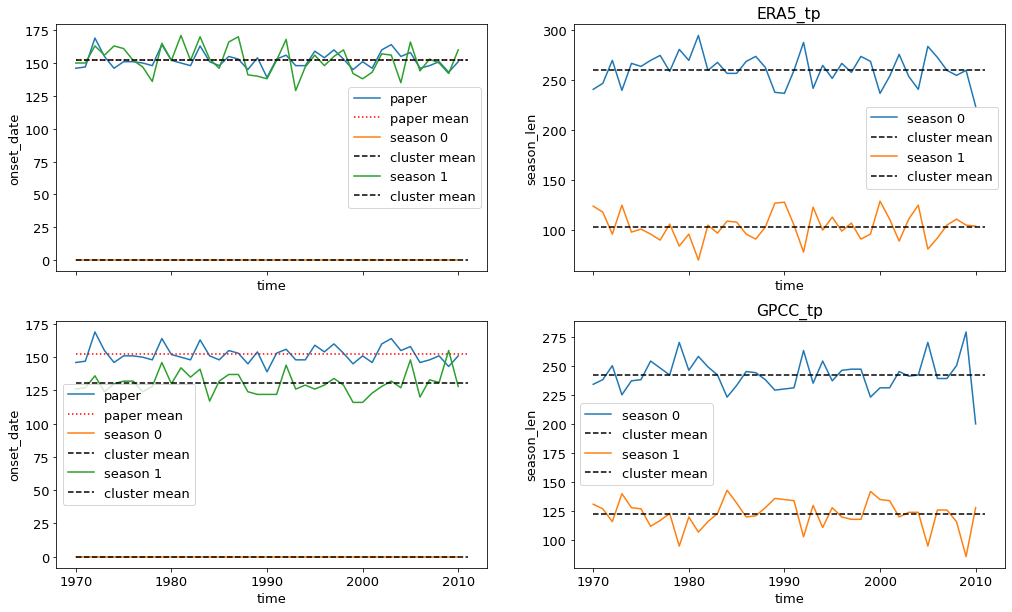

In [66]:
fig, axs = plt.subplots(len(dataset_names),2, figsize = (17,len(dataset_names)*5), sharex = True, sharey = False)

for i in range(len(dataset_names)):

    axs[i,0].plot(np.arange(st_yr,end_yr,1), onset_paper, label = f'paper')
    axs[i,0].hlines(np.mean(onset_paper), xmin=st_yr, xmax = end_yr, color='r', linestyle=':', label='paper mean')

    for j in range(n_season):

        axs[i,1].set_title(dataset_names[i])    
        axs[i,0].plot(np.arange(st_yr,end_yr,1), onset_date[i,:,j], label = f'season {j}')
        axs[i,0].hlines(np.mean(onset_date[i,:,j]), xmin=st_yr, xmax = end_yr, color='k', linestyle='--', label='cluster mean')
        axs[i,0].set_xlabel('time')
        axs[i,0].set_ylabel('onset_date')
        axs[i,0].grid() 
        axs[i,0].legend() 
        axs[i,1].plot(np.arange(st_yr,end_yr,1), season_len[i,:,j], label = f'season {j}')
        axs[i,1].hlines(np.mean(season_len[i,:,j]), xmin=st_yr, xmax = end_yr, color='k', linestyle='--', label='cluster mean')
        axs[i,1].set_xlabel('time')
        axs[i,1].set_ylabel('season_len')
        axs[i,1].grid()
        axs[i,1].legend()   



In [67]:
for i in range(len(dataset_names)):
    print(f'Correlation with dataset {dataset_names[i]}')
    a = np.corrcoef(onset_date[i,:,1],onset_paper)
    print(a[0,1])
    print(f'Mean error with dataset {dataset_names[i]}')
    print(np.mean(np.abs(onset_date[i,:,1] - onset_paper)))

Correlation with dataset ERA5_tp
0.54574824756918
Mean error with dataset ERA5_tp
6.609756097560975
Correlation with dataset GPCC_tp
0.3340161870994452
Mean error with dataset GPCC_tp
22.390243902439025


In [68]:
onset = [146,147,169,155,146,151,151,150,148,164,152,150,148,163,151,148,155,153,145,154,139,153,156,148,148,159,154,160,153,145,151,146,160,164,155,158,146,148,151,143,151]

In [69]:
np.mean(onset_date[0,:,1])

152.26829268292684

In [70]:
np.mean(onset_paper)

152.0487804878049